In [2]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from acquire import get_stores_data, get_sales_data, get_items_data, make_one_df, read_url_csv

In [4]:
df = make_one_df()
df=df.drop(columns=['sale_id', 'store_id','item_id'])
df.head()

,item,sale_amount,sale_date,store,store_address,store_city,store_state,store_zipcode,level_0,index,item_brand,item_name,item_price,item_upc12,item_upc14
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,0,0.0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,0,0.0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,0,0.0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,0,0.0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,0,0.0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013


# Convert date column to datetime format.

In [5]:
df.sale_date = pd.to_datetime(df.sale_date, infer_datetime_format=True)
df.head()

,item,sale_amount,sale_date,store,store_address,store_city,store_state,store_zipcode,level_0,index,item_brand,item_name,item_price,item_upc12,item_upc14
0,1,13.0,2013-01-01,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,0,0.0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,11.0,2013-01-02,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,0,0.0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,1,14.0,2013-01-03,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,0,0.0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,1,13.0,2013-01-04,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,0,0.0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,1,10.0,2013-01-05,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,0,0.0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013


# Plot the distribution of sale_amount and item_price.

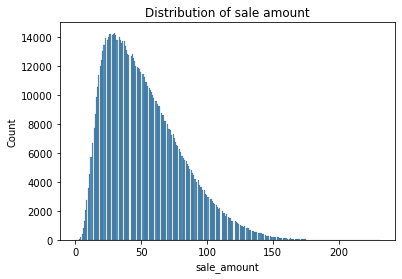

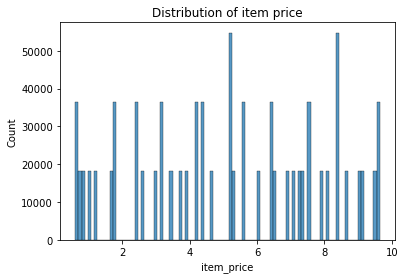

In [10]:
sns.histplot(df.sale_amount)
plt.title('Distribution of sale amount')
plt.show()

sns.histplot(df.item_price)
plt.title('Distribution of item price')
plt.show()

# Set the index to be the datetime variable.



In [11]:
df.set_index('sale_date', inplace=True)
df.head(3)

,item,sale_amount,store,store_address,store_city,store_state,store_zipcode,level_0,index,item_brand,item_name,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,0,0.0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-02,1,11.0,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,0,0.0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-03,1,14.0,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,0,0.0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013


# Add a 'month' and 'day of week' column to your dataframe.



In [12]:
df['month'] = df.index.strftime('%B')
df.head()

,item,sale_amount,store,store_address,store_city,store_state,store_zipcode,level_0,index,item_brand,item_name,item_price,item_upc12,item_upc14,month
sale_date,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,0,0.0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January
2013-01-02,1,11.0,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,0,0.0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January
2013-01-03,1,14.0,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,0,0.0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January
2013-01-04,1,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,0,0.0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January
2013-01-05,1,10.0,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,0,0.0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January


In [13]:
df['day_of_week'] = df.index.strftime('%A')
df.head()

,item,sale_amount,store,store_address,store_city,store_state,store_zipcode,level_0,index,item_brand,item_name,item_price,item_upc12,item_upc14,month,day_of_week
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,0,0.0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Tuesday
2013-01-02,1,11.0,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,0,0.0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Wednesday
2013-01-03,1,14.0,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,0,0.0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Thursday
2013-01-04,1,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,0,0.0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Friday
2013-01-05,1,10.0,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,0,0.0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Saturday


# Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.



In [14]:
df['sales_total'] = df.sale_amount * df.item_price


# Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [15]:
def convert_to_datetime(df):
    df.sale_date = pd.to_datetime(df.sale_date, infer_datetime_format=True)
    return df

# german Power data
1. Convert date column to datetime format.

In [17]:
df_power = pd.read_csv('power.csv', index_col='Unnamed: 0')
df_power.head()

#  Plot the distribution of each of your variables.



In [ ]:
for col in list(df_power.columns.drop('Date')):
    plt.figure()
    sns.histplot(df_power[col])
    plt.title('Distribution of {}'.format(col))

## Set the index to be the datetime variable
## Add a month and a year column to your dataframe.

In [ ]:
df_power.set_index('Date', inplace=True)
df_power.head()

In [ ]:
df_power['month'] = df_power.index.strftime('%B')
df_power['year'] = df_power.index.strftime('%Y')
df_power.head()

## Fill any missing values.



In [ ]:
for col in list(df_power.columns):
    print(df_power[col].isna().sum())

In [ ]:
df_power.fillna(0, inplace=True)
df_power.head()